In [1]:
from eurostatapiclient import EurostatAPIClient
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

legend_properties = {'weight':'bold','size':'12'}
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':
            'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 
            'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':
            'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia',
            'SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28'}
countries_abbr = ['AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI',
                  'FR','HR','HU','IE','IT','LT','LU','LV','NV','NL','PL','PT','RO','SE','SI','SK','UK','MT', 'EU28']

In [2]:
#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [3]:
def subcategorybar(X,vals,lower,upper,distance,col,rot,width=0.6):
    ax.grid(axis='y', color='silver', linestyle='--', linewidth=1)
    n = len(vals)
    _X = np.arange(len(X))
    X_ticks=np.append(_X,_X[-1]+1)
    X_ticks=np.insert(X_ticks,_X[0],_X[0]-0.5)
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", zorder=2, color=col[i])
        
    ax.set_xlim(left=X_ticks[0],right=X_ticks[-1]-0.5)
    ax.tick_params(axis='x', which='minor', length=0)    
    ax.set_xticks(_X, minor=True)
    ax.set_xticklabels(X, minor = True)
    ax.set_xticks(X_ticks-0.5, minor=False)
    ax.set_xticklabels('', minor=False)
    
    Y_ticks=range(lower,upper,distance)
    ax.set_yticks(Y_ticks)
    new_ticks= [str(i)+'%'for i in Y_ticks]
    new_ticks[0]='%'
    ax.set_yticklabels(new_ticks)
    ax.tick_params(axis='y', which='major', length=0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for tick in ax.get_xticklabels(minor=True):
        tick.set_rotation(rot)


In [5]:
params_df1 = {
    'na_item': ['P6','P7'],
    'sinceTimePeriod': '2012',
    'geo':'EU28',
    'unit':'PC_GDP'
}
dataframe_1 = client.get_dataset('nama_10_gdp', params=params_df1).to_dataframe()
params_df1.update({'lastTimePeriod': '2018'})
dataframe_1=dataframe_1[dataframe_1.time <= params_df1['lastTimePeriod']]
dataframe_1=dataframe_1.pivot(index='time', columns='na_item', values='values').reset_index().rename(columns={'P6':'Exports', 'P7':'Imports'})


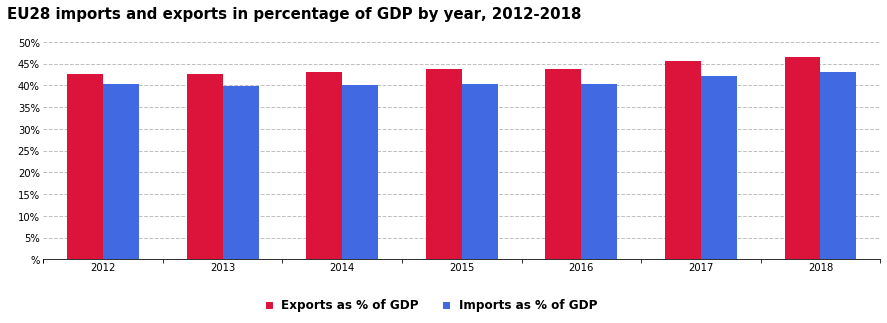

In [7]:
#make plot
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_1['time'], [dataframe_1['Exports'],dataframe_1['Imports']], 0,55,5, ['crimson','royalblue'],0)
red_patch = mpatches.Patch(color='crimson', label='Exports as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='Imports as % of GDP')
leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.26), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
for patch in leg.get_patches():
    patch.set_height(6)
ax.set_title('{} imports and exports in percentage of GDP by year, {}-{}'.format(params_df1['geo'],params_df1['sinceTimePeriod'],params_df1['lastTimePeriod']),
             fontsize=15,fontweight='bold',y=1.08, x=0.3)

plt.show()

In [8]:
params_df1_a = {
    'na_item': ['P6','D11'],
    'sinceTimePeriod': '2012',
    'geo':'BG',
    'unit':'PC_GDP'
}
dataframe_1_a = client.get_dataset('nama_10_gdp', params=params_df1_a).to_dataframe()
params_df1_a.update({'lastTimePeriod': '2018'})
dataframe_1_a=dataframe_1_a[dataframe_1_a.time <= params_df1_a['lastTimePeriod']]
dataframe_1_a=dataframe_1_a.pivot(index='time', columns='na_item', values='values').reset_index().rename(columns={'P6':'Exports', 'D11':'Imports'})


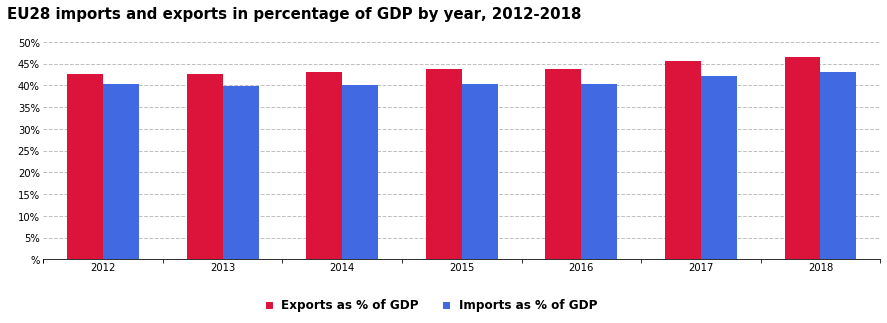

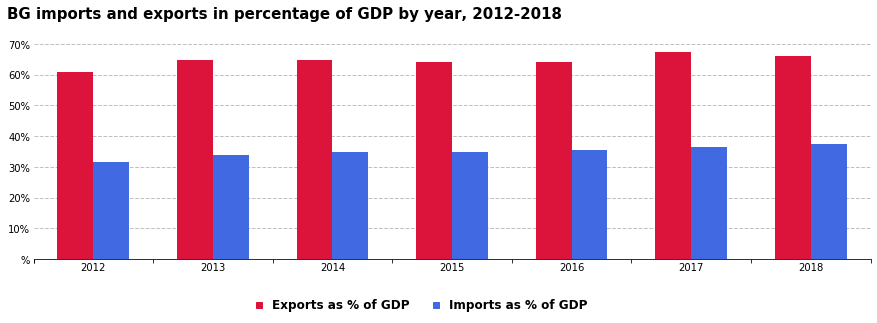

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_1['time'], [dataframe_1['Exports'],dataframe_1['Imports']], 0,55,5, ['crimson','royalblue','green'],0)
red_patch = mpatches.Patch(color='crimson', label='Exports as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='Imports as % of GDP')
leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.26), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
for patch in leg.get_patches():
    patch.set_height(6)
ax.set_title('{} imports and exports in percentage of GDP by year, {}-{}'.format(params_df1['geo'],params_df1['sinceTimePeriod'],params_df1['lastTimePeriod']),
             fontsize=15,fontweight='bold',y=1.08, x=0.3)





fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_1_a['time'], [dataframe_1_a['Exports'],dataframe_1_a['Imports']], 0,80,10, ['crimson','royalblue'],0)
red_patch = mpatches.Patch(color='crimson', label='Exports as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='Imports as % of GDP')
leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.26), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
for patch in leg.get_patches():
    patch.set_height(6)
ax.set_title('{} imports and exports in percentage of GDP by year, {}-{}'.format(params_df1_a['geo'],params_df1_a['sinceTimePeriod'],params_df1_a['lastTimePeriod']),
             fontsize=15,fontweight='bold',y=1.08, x=0.3)



plt.show()

In [11]:
params_df5_bop={
    'fdi_item': ['DO__D__F','DI__D__F'],
    'precision': '0',
    'geo':countries_abbr,
    'partner':'WRL_REST',
    'stk_flow':['NO','NI'],
    'currency':'MIO_EUR',
    'time':'2017',
    'entity':'TOTAL',
    'nace_r2':'FDI'
}

params_df5_gdp={
    'unit':'CP_MEUR',
    'na_item': 'B1G',
    'time':'2017',
    'geo':countries_abbr,
    'nace_r2':'TOTAL'
}

In [18]:
dataframe_5_bop = client.get_dataset('bop_fdi6_pos', params=params_df5_bop).to_dataframe().dropna()
dataframe_5_gdp = client.get_dataset('nama_10_a64', params=params_df5_gdp).to_dataframe()
dataframe_5= dataframe_5_bop.merge(dataframe_5_gdp[['values','geo']],how='left', left_on='geo', right_on='geo')
dataframe_5['per_gdp']=(dataframe_5['values_x']/dataframe_5['values_y'])*100
dataframe_5=dataframe_5.pivot(index='geo', columns='stk_flow', values='per_gdp').reset_index().rename(columns={'NI':'Inward', 'NO':'Outward'})
outlier=dataframe_5.loc[dataframe_5['geo'].isin(['IE','MT','CY','LU','NL'])]
dataframe_5=dataframe_5.loc[dataframe_5['geo'].isin(['IE','MT','CY','LU','NL','EU28'])==False].reset_index()
dataframe_5=dataframe_5.loc[dataframe_5['geo'].isin(['BG','HR','PL','RO','EE','LV','HU','CZ'])].reset_index()


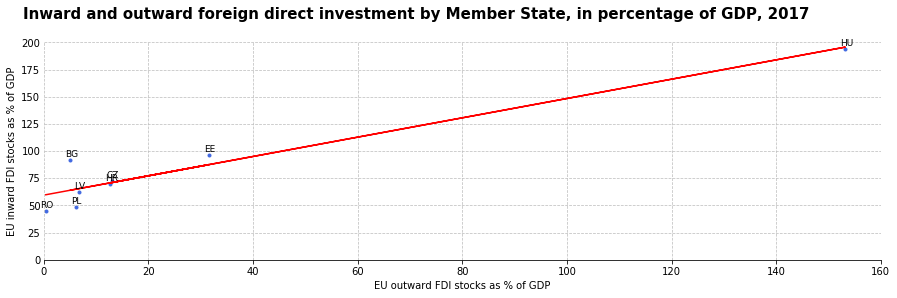

In [19]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.grid(axis='y', color='silver', linestyle='--', linewidth=0.75)
ax.grid(axis='x', color='silver', linestyle='--', linewidth=0.75)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(left=0,right=160)
ax.set_ylim(0,200)

ax.tick_params(axis='y', which='major', length=0)

for i,type in enumerate(dataframe_5['geo']):
    x = dataframe_5['Outward'][i]
    y = dataframe_5['Inward'][i]
    ax.scatter(x, y, marker='.', color='royalblue')
    ax.text(x-1, y+3, type, fontsize=9)

    
z = np.polyfit(dataframe_5['Outward'], dataframe_5['Inward'], 1)
p = np.poly1d(z)
plt.plot(dataframe_5['Outward'],p(dataframe_5['Outward']),"r")

ax.set_title('Inward and outward foreign direct investment by Member State, in percentage of GDP, {}'.format(params_df5_gdp['time']),
             fontsize=15,fontweight='bold',y=1.08, x=-0.025, loc='left')
plt.xlabel('EU outward FDI stocks as % of GDP')
plt.ylabel('EU inward FDI stocks as % of GDP')

plt.show()